In [211]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re

In [212]:
df = pd.read_csv("../data/shark_attack_cleaned.csv",sep=',' ,encoding= 'latin_1')
df = df.rename(columns={"index": "original_order"})



In [213]:
def standardize_species(species):
    if not isinstance(species, str):
        return 'Unknown'
    species = str(species.lower())
    
    # Comprehensive list of common shark species for extraction
    common_species = [
        ('white', ['white', 'great white']),
        ('tiger', ['tiger']),
        ('nurse', ['nurse', 'grey nurse']),
        ('blue', ['blue', 'blue pointer', 'blue pointers']),
        ('blacktip', ['blacktip', 'black-tipped']),
        ('mako', ['mako']),
        ('whitetip', ['whitetip', 'white tip']),
        ('bronze whaler', ['bronze whaler']),
        ('lemon', ['lemon']),
        ('bull', ['bull']),
        ('hammerhead', ['hammerhead', 'large hammerhead']),
        ('silvertip', ['silvertip', 'silver tip']),
        ('galapagos', ['galapagos']),
        ('sevengill', ['sevengill', 'seven-gill', 'broadnose sevengill']),
        ('wobbegong', ['wobbegong', 'wobbegongs']),
        ('shovelnose', ['shovelnose', 'shovel nose']),
        ('guitarfish', ['guitarfish', 'shovelnose guitarfish']),
        ('porbeagle', ['porbeagle']),
        ('angel', ['angel']),
        ('caribbean reef', ['caribbean reef'])
    ]
    
    for shark_standard, shark_variants in common_species:
        for variant in shark_variants:
            if variant in species:
                return shark_standard.capitalize() + " shark"
    
    
    return 'Unknown'

df['cleaned_species'] = df['species'].apply(standardize_species)
df


,original_order,case_number,date,cleaned_date,year,type,country,area,location,activity,...,age,injury,fatal_(y/n),time,species,investigator_or_source,pdf,href_formula,href,cleaned_species
0,1,ND.0001,1845-1853,NaN,0.0,Unprovoked,CEYLON (SRI LANKA),Eastern Province,"Below the English fort, Trincomalee",Swimming,...,15,"FATAL. ""Shark bit him in half, carrying away t...",Y,NaN,NaN,S.W. Baker,ND-0001-Ceylon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,Unknown
1,2,ND.0002,1883-1889,NaN,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ÂºN, 79ÂºW",NaN,...,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,Unknown
2,3,ND.0003,1900-1905,NaN,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,...,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,Unknown
3,4,ND.0004,Before 1903,NaN,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,...,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,Unknown
4,5,ND.0005,Before 1903,NaN,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,...,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,6298,2018.06.04,04-Jun-2018,2018-06-04,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,...,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,Tiger shark
6298,6299,2018.06.08,08-Jun-2018,2018-06-08,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,...,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,Unknown
6299,6300,2018.06.09,09-Jun-2018,2018-06-09,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,...,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,Unknown
6300,6301,2018.06.18,18-Jun-2018,2018-06-18,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,...,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,Unknown


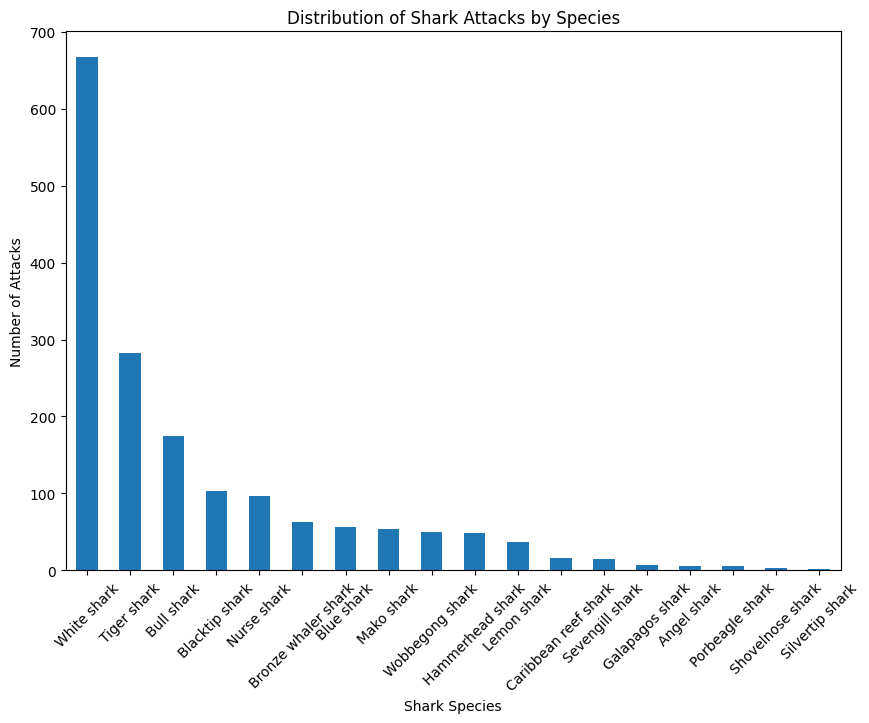

In [214]:
species_counts = df['cleaned_species'].value_counts()

species_counts = species_counts[species_counts.index != 'Unknown']

species_counts.plot(kind='bar', figsize=(10,7))
plt.title('Distribution of Shark Attacks by Species')
plt.xlabel('Shark Species')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.show()

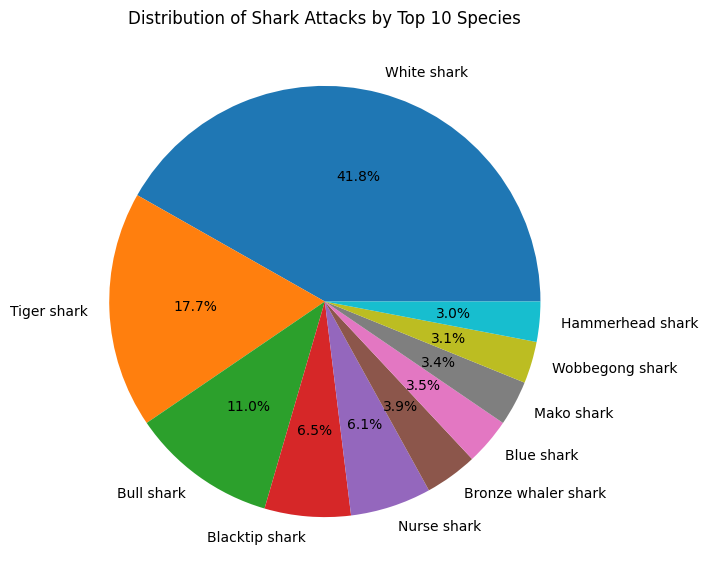

In [215]:
top_species_counts = species_counts.head(10)

plt.figure(figsize=(10,7))
top_species_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Shark Attacks by Top 10 Species')
plt.ylabel('') 
plt.show()

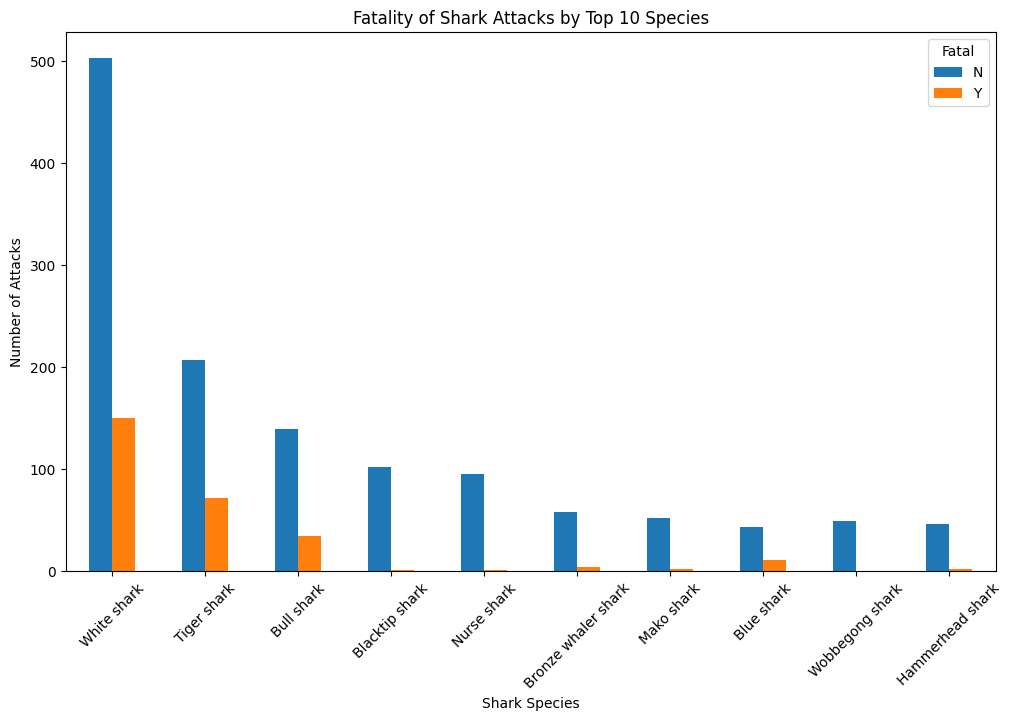

In [216]:
df_filtered_unkown = df[df['fatal_(y/n)'] != 'Unknown']
fatal_counts = df_filtered_unkown.groupby(["cleaned_species", 'fatal_(y/n)']).size().unstack(fill_value=0)
fatal_counts = fatal_counts[fatal_counts.index != 'Unknown']
# Sort the data by total attacks for better visualization
fatal_counts['total'] = fatal_counts.sum(axis=1)
fatal_counts = fatal_counts.sort_values('total', ascending=False).drop(columns='total')

# Plotting
fatal_counts.head(10).plot(kind='bar', stacked=False, figsize=(12,7))
plt.title('Fatality of Shark Attacks by Top 10 Species')
plt.xlabel('Shark Species')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.legend(title='Fatal')
plt.show()

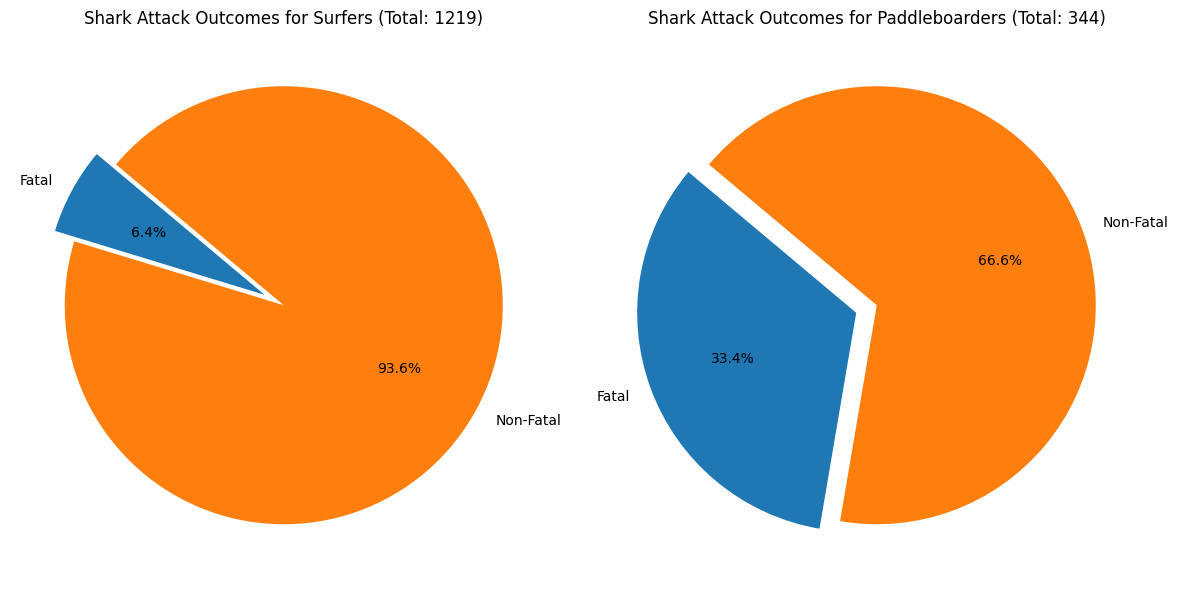

In [217]:
surfing_related = df[df['activity'].str.contains('surfing|wave|surf|surfer', case=False, na=False)]
paddleboarding_related = df[df['activity'].str.contains('paddle|board|paddleboard', case=False, na=False)]

# Counting fatalities and non-fatalities for surfing
surfing_fatal = len(surfing_related[surfing_related['fatal_(y/n)'] == 'Y'])
surfing_non_fatal = len(surfing_related[surfing_related['fatal_(y/n)'] == 'N'])

# Counting fatalities and non-fatalities for paddleboarding
paddleboarding_fatal = len(paddleboarding_related[paddleboarding_related['fatal_(y/n)'] == 'Y'])
paddleboarding_non_fatal = len(paddleboarding_related[paddleboarding_related['fatal_(y/n)'] == 'N'])

# Data for pie chart for surfing
labels_surfing = ['Fatal', 'Non-Fatal']
sizes_surfing = [surfing_fatal, surfing_non_fatal]
colors = ['red', 'green']
explode = (0.1, 0)  

# Data for pie chart for paddleboarding
labels_paddleboarding = ['Fatal', 'Non-Fatal']
sizes_paddleboarding = [paddleboarding_fatal, paddleboarding_non_fatal]

# Plotting pie chart for surfing
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(sizes_surfing, explode=explode, labels=labels_surfing,  autopct='%1.1f%%', startangle=140)
plt.title(f'Shark Attack Outcomes for Surfers (Total: {surfing_fatal + surfing_non_fatal})')

# Plotting pie chart for paddleboarding
plt.subplot(1, 2, 2)
plt.pie(sizes_paddleboarding, explode=explode, labels=labels_paddleboarding, autopct='%1.1f%%',  startangle=140)
plt.title(f'Shark Attack Outcomes for Paddleboarders (Total: {paddleboarding_fatal + paddleboarding_non_fatal})')

# Displaying the pie charts
plt.tight_layout()
plt.show()

